### Importing the necessary libraries

In [1]:
# Data manipulation and handling and visualization libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#NMF
from sklearn.decomposition import NMF

# clustering library
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

## Loading the dataset

In [2]:
df = pd.read_csv('spotify.xls', index_col = 0)

In [3]:
df.head()

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_1,2,2,8,8,13,1,4,9,1,2,...,14,2,14,1,9,0,11,6,14,7
user_2,13,5,5,5,12,8,10,10,2,2,...,10,6,11,1,1,5,12,8,3,0
user_3,3,9,2,8,0,1,11,7,3,7,...,9,5,7,15,12,13,14,5,0,14
user_4,2,6,7,8,14,0,12,7,8,1,...,9,15,9,14,10,6,11,13,6,0
user_5,11,12,8,6,13,7,0,7,3,13,...,12,14,11,11,11,7,3,6,11,7


In [4]:
df.shape

(1000, 5000)

## Spotify Reccomendation System

In [5]:
X = df.values
X

array([[ 2,  2,  8, ...,  6, 14,  7],
       [13,  5,  5, ...,  8,  3,  0],
       [ 3,  9,  2, ...,  5,  0, 14],
       ...,
       [ 6,  2,  1, ..., 13,  6, 13],
       [ 7,  0,  8, ..., 11,  9, 12],
       [ 6, 15,  0, ..., 15,  4,  5]], dtype=int64)

## Non Negative Matrix vectorization(NMF)

In [6]:
nmf = NMF(n_components = 100, max_iter = 1000, random_state = 3)

In [7]:
nmf.fit(X)

C:\Users\91994\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\91994\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


NMF(max_iter=1000, n_components=100, random_state=3)

In [8]:
user_matrix = nmf.transform(X)
song_matrix = nmf.components_.T

In [9]:
user_matrix

array([[1.59597279, 1.63144383, 0.        , ..., 0.        , 0.        ,
        0.08842005],
       [0.        , 1.37058116, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.25150672, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.86093206, ..., 0.        , 2.91063979,
        0.        ],
       [0.89111106, 0.55775866, 5.28815626, ..., 1.14447003, 0.        ,
        0.        ],
       [0.11437224, 0.3810454 , 1.17187612, ..., 0.        , 0.        ,
        0.        ]])

In [10]:
user_matrix.shape

(1000, 100)

In [11]:
song_matrix.shape

(5000, 100)

## Steps for building a recommendation system - type1(For local library or small dataset)

1. Consider recommending song to the first user(row location 0 in user matrix)
2. Find the Euclidian Distance between this first user and the remaining 999 users
3. Find out top 10 songs heard by nearest 5 users.
4. Recommend this 10 songs to the first user.


## Calculating the distance between two users

In [12]:
def col_dist(u1, u2):
    return pow(sum(pow(u1[x]-u2[x], 2)for x in range(len(u1))), 0.5)

In [13]:
col_dist(user_matrix[0], user_matrix[1])

17.06638660058237

In [14]:
def dist_from_remaining_users(b_user, user_matrix):
    dist = []
    for i in range(len(user_matrix)):
        if b_user != i:
            dist.append(col_dist(user_matrix[b_user], user_matrix[i]))
            
    return dist

In [15]:
dist_user1 = dist_from_remaining_users(0, user_matrix)

In [16]:
dist_user1

[17.06638660058237,
 15.356075620146399,
 15.860626596945849,
 15.085478037663158,
 13.844410783916606,
 14.938304994654965,
 13.250608545517025,
 16.84837011765563,
 15.146562759546319,
 15.085160715078564,
 15.426113947184342,
 15.162198319210791,
 8.915369316375884,
 16.067019685279767,
 14.192876182082257,
 12.163103729780717,
 15.342023557914404,
 15.107063797600544,
 12.398262626533246,
 13.01457730356004,
 15.558351007727849,
 15.606333529857164,
 16.157732435613067,
 16.37243632205563,
 15.742562230904207,
 15.287379333888204,
 14.678932331051405,
 13.958180488851008,
 16.353768628488638,
 16.16795046329455,
 15.592805868343994,
 15.300255566344516,
 14.813458275392913,
 14.672279075686863,
 14.966327525788472,
 14.957592290949487,
 15.289917563002692,
 15.751052100338896,
 15.536270217142622,
 13.989176491514446,
 15.5842948999552,
 14.422344102573902,
 14.029914554414384,
 14.498613243078754,
 15.124960994278396,
 14.030779563311285,
 12.413550520275182,
 14.918957038657634,


In [17]:
len(dist_user1)

999

### Finding Nearest 5 Users

In [18]:
nearest_users = np.argsort(dist_user1)[:5]

In [19]:
for i in range(len(nearest_users)):
    nearest_users[i] +=1

In [20]:
nearest_users

array([ 13, 614, 666, 914, 395], dtype=int64)

In [21]:
for i in nearest_users:
    print("Songs heared by user", i, "are:")
    temp = df.iloc[i]
    print(temp[temp.values !=0].index)

Songs heared by user 13 are:
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_6', 'song_7', 'song_8',
       'song_9', 'song_10', 'song_13',
       ...
       'song_4989', 'song_4990', 'song_4991', 'song_4992', 'song_4993',
       'song_4994', 'song_4995', 'song_4997', 'song_4998', 'song_5000'],
      dtype='object', length=4687)
Songs heared by user 614 are:
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4686)
Songs heared by user 666 are:
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', lengt

Picking out top 10 songs from above list of songs

In [22]:
def topNsongs(nearest_users, df, N):
    temp = df.iloc[nearest_users]
    dict1 = temp.max().to_dict()
    #print(dict1)
    
# converting every key value pair into a tuple and swapping them for sorting purpose, End result is a list of
# song and number of times heard tuple
    sorted_dict = sorted(dict1.items(), key = lambda keyvalue: (keyvalue[1], keyvalue[0]), reverse = True)[:N]
    # print(sorted_dict)
    return [x[0] for x in sorted_dict]
    # return 0

In [23]:
topNsongs(nearest_users, df, 15)

['song_998',
 'song_990',
 'song_99',
 'song_988',
 'song_987',
 'song_986',
 'song_985',
 'song_982',
 'song_979',
 'song_968',
 'song_96',
 'song_958',
 'song_951',
 'song_95',
 'song_949']

## Type 2 Recommendation System for larger data set 

- K means clustering

In [24]:
WCSS = {}
for k in range(1, 50):
    k_means = KMeans(n_clusters = k, max_iter = 1000).fit(song_matrix)
    WCSS[k] = k_means.inertia_
    
    #inertia measures how well a dataset was clustered by kmeans


In [25]:
WCSS

{1: 14072.226800986818,
 2: 13906.76847738879,
 3: 13774.181054883467,
 4: 13672.274389197875,
 5: 13590.675338473482,
 6: 13520.088401813211,
 7: 13460.887543722634,
 8: 13398.617870467031,
 9: 13347.753280581968,
 10: 13302.789210524832,
 11: 13268.882265895181,
 12: 13236.145933000565,
 13: 13195.32724739465,
 14: 13177.11413807903,
 15: 13145.565108972974,
 16: 13120.327274804686,
 17: 13102.506099137823,
 18: 13085.540309442396,
 19: 13056.744812732357,
 20: 13028.811943165147,
 21: 13023.147979942767,
 22: 13000.405719037017,
 23: 12986.149341965269,
 24: 12968.527888669707,
 25: 12947.552113508822,
 26: 12925.914746659473,
 27: 12913.979871309197,
 28: 12915.351413615948,
 29: 12885.815907277281,
 30: 12881.431032475231,
 31: 12873.128953140309,
 32: 12846.45842563393,
 33: 12836.055030902022,
 34: 12833.045232111306,
 35: 12814.493712339463,
 36: 12793.323103823466,
 37: 12788.982512709892,
 38: 12774.466852591328,
 39: 12768.299884294622,
 40: 12753.936770697292,
 41: 12738.14

Text(0, 0.5, 'WCSS')

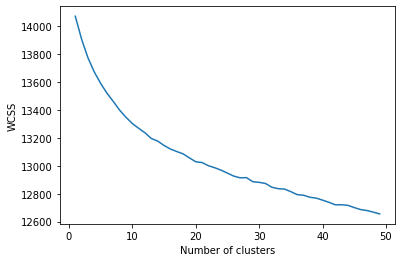

In [26]:
plt.plot(WCSS.keys(), WCSS.values())
plt.xlabel("Number of clusters")
plt.ylabel('WCSS')

In [27]:
def songs_in_cluster(N_clusters, df, song_matrix, song_name, n_recommendations):
    kmeans = KMeans(n_clusters = N_clusters, max_iter = 1000).fit(song_matrix)
    index_in_song = df.columns.to_list().index(song_name)
    #print(index_in_song)
    song_vector = song_matrix[index_in_song] # song_vector = genre score of given song
    #print(song_vector)
    all_songs_in_cluster = kmeans.predict(song_matrix)
    #print(len(all_songs_in_cluster))
    
    
    # Finding songs which belongs to same cluster as of songs passed in song_name    
    songs_in_selected_cluster = [X for X in range(len(all_songs_in_cluster))
                                if all_songs_in_cluster[X] == kmeans.predict([song_vector])]
    #print(len(songs_in_selected_cluster))
    song_cluster = song_matrix[songs_in_selected_cluster]
    
    #print(song_cluster)
    neighbors = NearestNeighbors(n_neighbors = n_recommendations)
    neighbors.fit(song_cluster)
    recommended_songs = neighbors.kneighbors([song_matrix[index_in_song]])
    #print(recommended_songs[1][0])
    
    
    songs = df.columns
    return[songs[X] for X in recommended_songs[1][0]]

In [28]:
songs_in_cluster(15, df, song_matrix, 'song_5', 5)

['song_2', 'song_258', 'song_203', 'song_312', 'song_96']